# Neuronal compartment comparison
Loads some intermediate data and performs the compartment comparison analysis from the current manuscript. 

The intermediate data consists of:
* `data/fullmitostats.csv` - A dataframe describing the mitochondria of each cell. See the README and columns below for the included statistics.

In [1]:
# just getting past the weird Static TLS thing...
from meshparty import trimesh_io

from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

from lib import plot, u

In [2]:
MITODF_FILENAME = "test.csv"
CLEANIDS_FILENAME = "intermeds/200611_clean_ids.csv"

#### Reading data

In [3]:
mitodf = pd.read_csv(MITODF_FILENAME, index_col=0)
cleanids = u.readids(CLEANIDS_FILENAME)

#### Restricting analysis to cells with QC'd compartment labels

In [4]:
mitodf = mitodf[mitodf.cellid.isin(cleanids)]

In [5]:
mitodf.head()

,mito_vx,ctr_pos_x_vx,ctr_pos_y_vx,ctr_pos_z_vx,bbox_beg_x_vx,bbox_beg_y_vx,bbox_beg_z_vx,bbox_end_x_vx,bbox_end_y_vx,bbox_end_z_vx,cellid,ctr_pos_x_nm,ctr_pos_y_nm,ctr_pos_z_nm,surface_area,complexityindex,compartment
mito_id,,,,,,,,,,,,,,,,,
1776789,523452,74500,43210,1457,73444,42632,1401,75636,43732,1564,648518346349538102,298000,172840,58280,6.992364,30.063988,Apical
3274765,28928,101724,45126,1527,101666,45084,1519,101790,45168,1538,648518346349533350,406896,180504,61080,0.597341,6.137019,Basal
2278727,639232,81958,57076,1632,81550,56774,1549,82466,57562,1745,648518346349539401,327832,228304,65280,6.389076,15.378901,Basal
2635064,1034492,90120,59784,1155,88866,58924,1099,91392,60532,1198,648518346349538440,360480,239136,46200,11.151718,31.224768,Basal
4006807,23496,114062,75542,225,114014,75520,217,114110,75570,236,648518346349532006,456248,302168,9000,0.398477,2.761537,Axonal


In [6]:
mitodf.shape

(6502, 17)

In [7]:
Counter(mitodf.compartment)

Counter({'Apical': 1332,
         'Basal': 3442,
         'Axonal': 435,
         'Somatic': 1247,
         'Unknown': 37,
         'Unknown dendritic': 9})

## Mitochondrion volume

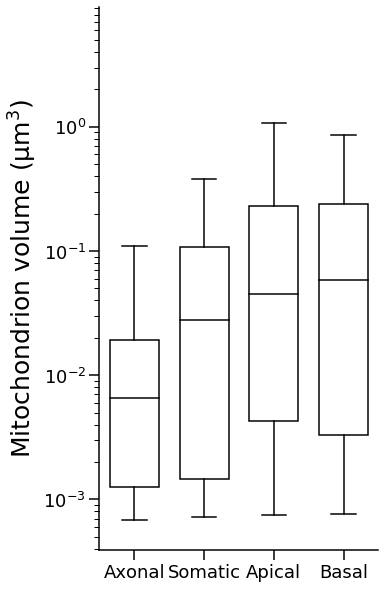

In [8]:
plt.figure(figsize=(5, 10))

plot.boxplot_by_comp(mitodf, varname="mito_vx", varscale=plot.DEFAULT_VX_VOL)
plt.yscale("log")

plot.plt.show()

### Statistics

In [9]:
axon_to_soma = stats.mannwhitneyu(
    mitodf.mito_vx[mitodf.compartment == "Axonal"],
    mitodf.mito_vx[mitodf.compartment == "Somatic"],
    alternative="less")

soma_to_apical = stats.mannwhitneyu(
    mitodf.mito_vx[mitodf.compartment == "Somatic"],
    mitodf.mito_vx[mitodf.compartment == "Apical"],
    alternative="less")

apical_to_basal = stats.mannwhitneyu(
    mitodf.mito_vx[mitodf.compartment == "Apical"],
    mitodf.mito_vx[mitodf.compartment == "Basal"],
    alternative="less")

In [10]:
axon_to_soma

MannwhitneyuResult(statistic=186279.0, pvalue=1.0314622958483293e-22)

In [11]:
soma_to_apical

MannwhitneyuResult(statistic=698239.5, pvalue=1.2897838700903288e-12)

In [12]:
apical_to_basal

MannwhitneyuResult(statistic=2264455.0, pvalue=0.2566870311017714)

### Re-plotting with significance annotations

In [13]:
p95s = list()
for comp in ['Axonal', 'Somatic', 'Apical', 'Basal']:
    subdf = mitodf[mitodf.compartment == comp]
    p95s.append(np.percentile(mitodf.mito_vx * plot.DEFAULT_VX_VOL, 95))

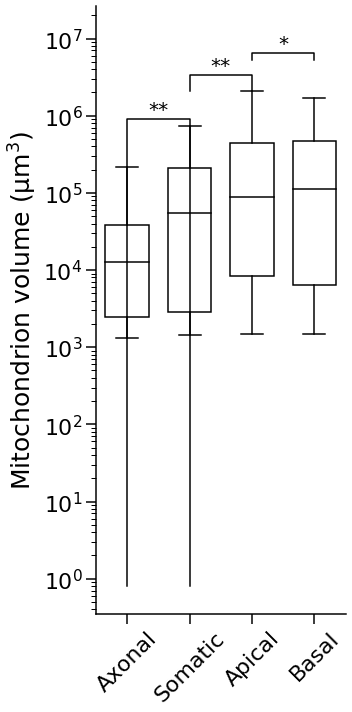

In [14]:
plt.figure(figsize=(5, 10))
plot.boxplot_by_comp(mitodf)
plt.yscale("log")

plot.barplot_annotate_brackets(0, 1, '**', np.arange(4), p95s, dh=0)
plot.barplot_annotate_brackets(1, 2, '**', np.arange(4), p95s, dh=0.08)
plot.barplot_annotate_brackets(2, 3, '*', np.arange(4), p95s, dh=.2)

plt.xticks(rotation=45, fontsize=22)
plt.yticks(fontsize=22)

plot.plt.tight_layout()
plot.plt.show()

## Mitochondrion complexity index

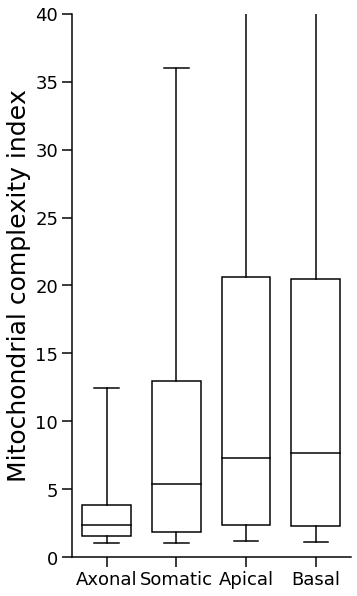

In [15]:
plt.figure(figsize=(5, 10))

plot.boxplot_by_comp(mitodf, varname="complexityindex")
plt.ylim(0, 40)

plot.plt.show()

### Statistics

In [16]:
axon_to_soma = stats.mannwhitneyu(
    mitodf.complexityindex[mitodf.compartment == "Axonal"],
    mitodf.complexityindex[mitodf.compartment == "Somatic"],
    alternative="less")

soma_to_apical = stats.mannwhitneyu(
    mitodf.complexityindex[mitodf.compartment == "Somatic"],
    mitodf.complexityindex[mitodf.compartment == "Apical"],
    alternative="less")

apical_to_basal = stats.mannwhitneyu(
    mitodf.complexityindex[mitodf.compartment == "Apical"],
    mitodf.complexityindex[mitodf.compartment == "Basal"],
    alternative="less")

In [17]:
axon_to_soma

MannwhitneyuResult(statistic=179692.0, pvalue=4.6104758843622303e-26)

In [18]:
soma_to_apical

MannwhitneyuResult(statistic=710679.0, pvalue=1.1439860727063705e-10)

In [19]:
apical_to_basal

MannwhitneyuResult(statistic=2295255.0, pvalue=0.526912040272541)

### Re-plotting with significance annotations

In [20]:
p95s = list()
for comp in ['Axonal', 'Somatic', 'Apical', 'Basal']:
    subdf = mitodf[mitodf.compartment == comp]
    p95s.append(np.percentile(mitodf.complexityindex, 95))

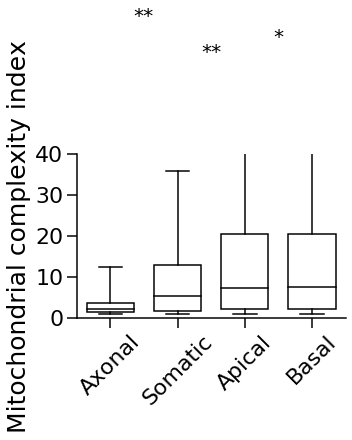

In [21]:
plt.figure(figsize=(5, 10))
plot.boxplot_by_comp(mitodf, varname="complexityindex")
plt.ylim(0, 40)

plot.barplot_annotate_brackets(0, 1, '**', np.arange(4), p95s, dh=0.3)
plot.barplot_annotate_brackets(1, 2, '**', np.arange(4), p95s, dh=0.08)
plot.barplot_annotate_brackets(2, 3, '*', np.arange(4), p95s, dh=0.175)

plt.xticks(rotation=45, fontsize=22)
plt.yticks(fontsize=22)

plot.plt.tight_layout()
plot.plt.show()